# Finite Volume Method 개요

**강좌**: *기초 전산유체역학*

## 보존식에 대한 구성
1차원 보존식 (Conservation Law)는 다음과 같다.

$$
\frac{\partial u}{\partial t} + \frac{\partial f}{\partial x} = 0.
$$

불연속한 해 $u$ 를 다루기 위해서 Control volume $[t_1, t_2] \times [x_L, x_R]$ 에서 적분형 식을 고려한다.

$$
\int_{t_1}^{t_2} \int_{x_L}^{x_R} 
\left (\frac{\partial u}{\partial t} + \frac{\partial f}{\partial x} 
\right ) dx dt = 0.
$$

또는 다음과 같은 weak form을 고려하기도 한다.

$$
\int_{0}^{\infty} \int_{-\infty}^{\infty} 
\left (
\frac{\partial w}{\partial t} u + \frac{\partial w}{\partial x} f
\right )
 dx dt = - \int_{-\infty}^{\infty} w(x, 0) u(x, 0) dx
$$

여기서 $w(x,t)$ 는 smooth test 함수로, 무한한 시간 또는 무한한 공간 경계에서 값이 0 인 임의의 함수이다.

첫번째 적분형 식에 대해 차분하면 유한체적법 결과를 얻을 수 있다.

두번째 식을 활용하는 차분법은 유한요소법 또는 불연속 갤러킨 기법 등을 유도할 수 있다.

:::{figure-md} FVM
<img src="https://blog.altair.co.kr/wp-content/uploads/2022/09/%EA%B7%B8%EB%A6%BC4.png">

FVM
:::

여기서 격자 $I_i = [x_{i-1/2}, x_{i+1/2}]$, 시간 $t=t_n$ 에서 근사해 $U_i^n$는 다음과 같다.

$$
U_i^n \approx \frac{1}{\Delta x_i} \int_{I_i} u(x, t_n) dx,
$$

여기서 $\Delta x_i = x_{i+1/2} - x_{i-1/2}$ 이다.

위 보존식을 공간에 대해 적분하면 다음과 같다.

$$
\frac{d}{dt} \int_{I_i} u(x, t_n) dx = f(u(x_{i+1/2}, t) - f(u(x_{i-1/2}, t)
$$

외재적으로 시간 적분을 근사화하면 다음과 같다.

$$
\int_{I_i} u(x, t_{n+1}) dx - \int_{I_i} u(x, t_n) dx
=
\int_{t_n}^{t_{n+1}} f(u(x_{i+1/2}, t) dt 
- \int_{t_n}^{t_{n+1}} f(u(x_{i-1/2}, t) dt. 
$$

여기서 Flux에 대한 적분을 다음과 같이 근사화 하면

$$
F^n_{i+1/2} \approx \frac{1}{\Delta t} \int_{t_n}^{t_{n+1}} f(u(x_{i+1/2}, t) dt,
$$

시간 $[t_n, t_{n+1}]$과 격자 $I_i$ 에 대해 적분한 보존식은 다음과 같이 표현할 수 있다.

$$
U_i^{n+1} = U_i^n - \frac{\Delta t}{\Delta x} \left (
F^n_{i+1/2} - F^n_{i-1/2}
\right )
$$

격자 경계에서는 Riemann Problem을 풀어서 Flux $F_{i+1/2}^n$ 을 계산한다.

$$
u(\hat{x}/\hat{t}) = \left \{
\begin{array}{cc} 
u_L & \hat{x}/\hat{t} < \lambda \\
u_R & else 
\end{array}
\right .
$$

여기서 $\hat{x}, \hat{t}$ 는 $t=t^n$ $x=x_{i+1/2}$ 기준 국소적인 시간과 공간 좌표이다. $\lambda$ 는 Characteristics의 속도이다.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

Text(0.5, 0, '$\\hat{x}$')

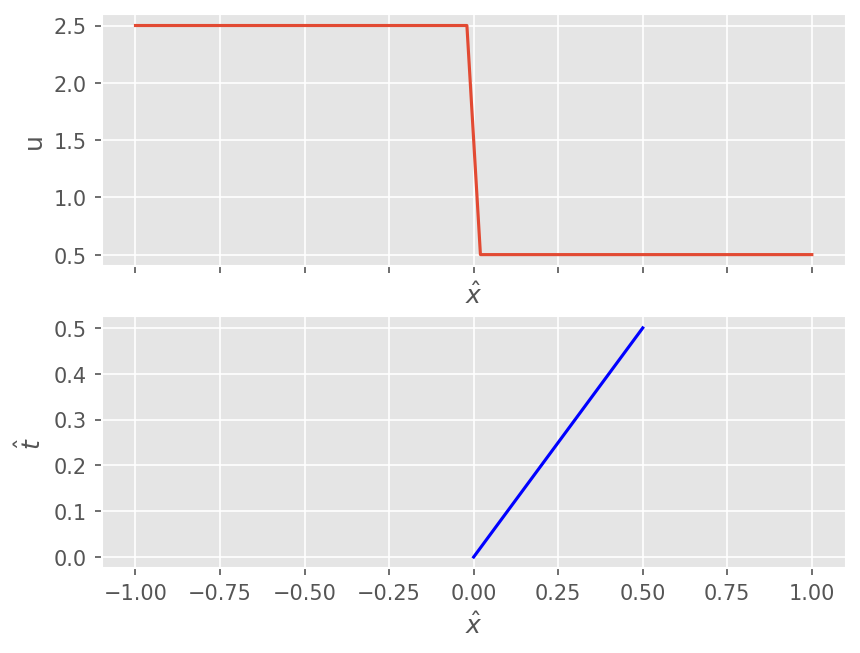

In [2]:
x = np.linspace(-1, 1, 101)
u = -np.tanh(1e8*x) + 1.5
t = np.linspace(0, 0.5, 101)

fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(x, u)
axs[0].set_xlim(-1.1, 1.1)
axs[0].set_ylabel('u')
axs[0].set_xlabel('$\hat{x}$')

a = 1
xs = a*t
    
# Characteristics
axs[1].plot(xs, t, color='blue')

axs[1].set_ylabel(r'$\hat{t}$')
axs[1].set_xlabel(r'$\hat{x}$')

Godunov (1959) 는 최초로 유한체적법을 제안했으며, Exact Riemann problem을 해석하는 Flux 기법을 Godunov method 라고 부른다.

Euler 방정식과 같이 비선형 방정식에서 Exact Riemann problem을 해석하는 것은 매우 어려우며, 
이를 근사적으로 푸는 다양한 기법들이 개발되었다. 근사화된 Flux (Numerical Flux)는 다음과 같다.

$$
F_{i+1/2}^n = \mathcal{F} (U_i^n, U_{i+1}^n).
$$

그러므로 유한체적법에서는 보존식을 다음과 같이 해석한다.

$$
U_i^{n+1} = U_i^n - \frac{\Delta t}{\Delta x} \left (
\mathcal{F} (U_i^n, U_{i+1}^n) 
- \mathcal{F} (U_{i-1}^n, U_{i}^n)
\right )
$$

이 결과는 유한차분법에서 구한 결과와 같은 형태이다.

## Convergence
수치적으로 계산한 결과과 이론적으로 구한 해에 수렴하려면 Consistency와 Stability를 만족해야 한다.

- Consistency : 국소적으로 근사식이 실제 방정식을 잘 근사해야 함
- Stability : 오차가 증폭되지 않아야 함

### Consistency
유한체적법에서는 수치 Flux가 이론식에서 Flux를 잘 근사화해야 한다. 같은 값을 갖는 유동에서는 수치 Flux가 이론 Flux와 같아야 한다.

$$
\mathcal{F}(\bar{u}, \bar{u}) = f(\bar{u}).
$$

이를 일반화해서 표현하면 다음과 같이 `Lipschitz continuity`로 표현할 수 있다.

$$
\mathcal{F}(U_i, U_{i+1}) - f(\bar{u}) 
\leq
L \max \left (
|U_i - \bar{u}|, |U_{i+1} - \bar{u}|
\right ),
$$

여기서 $L$ 은 상수이다.

### CFL 조건
안정성을 확인하는 방법은 유한차분법에서 확인한 것 과 같은 방식으로 구할 수 있다. 
수치 안정석을 만족하는 결과는 CFL 조건으로 정리할 수 있다.

- CFL 조건
   수치적이 Domain of Dependence가 이론 방정식의 Domain of Dependence를 포함해야 한다.
   
파동의 전파 속도가 $a$ 인 선형 파동 방정식의 경우

$$
X - \Delta x \le X - a \Delta t \le X + \Delta x
$$

즉

$$
CFL = \left |
\frac{a \Delta t}{\Delta x}
\right | \le 1.
$$

## Some Numerical Fluxes

### Unstable Flux
가장 간단한 평균값으로 구하는 Flux이다.

$$
F_{i+1/2}^n = \mathcal{F} (U_i^n, U_{i+1}^n) = \frac{1}{2} 
\left [
f(U_i^n) + f(U_{i+1}^n)
\right ].
$$

이를 적용하면

$$
U_i^{n+1} = U_i^n + \frac{\Delta t}{2 \Delta x} \left (
f(U_{i+1}^n - f(U_{i-1}^n
\right ).
$$

즉 유한 차분법에서 FTCS와 같다. 이 기법은 CFL 조건을 만족하지 않아 불안정하다.

### Upwind Method
유한체적법에서 유동의 전파 특성을 고려해서 One-side 차분식을 적용해서 Upwind 기법을 개발하였다.
이 Flux 기법 역시 유한체적법으로 구현할 수 있다.

$$
F_{i+1/2}^n = \mathcal{F} (U_i^n, U_{i+1}^n) = \frac{1}{2} 
\left [
f(U_i^n) + f(U_{i+1}^n)
\right ]
- \frac{1}{2} |a_{i+1/2}| \left (
U_{i+1}^n - U_i^n
\right )
$$

여기서 $|a_{i+1/2}|$ 는 Wave speed 이다.

- 1차 정확도를 갖는다
- $CFL \le 1$ 에서 수치적으로 안정하다.

## 경계 조건
유한 체적법에서는 일반적으로 경계면에서 반사된 가상의 격자 (Ghost Cell)을 추가하고 여기에 값을 부여한 후 Flux를 계산한다.

### Transparent condition
Wave가 계산 영역을 지나가는 경우 경계에서 값이 유지된다고 생각한다.

$$
U_0^n = U_{1}^n, U_{M+1}^n = U_{M}^n.
$$

### Periodic condition
Sine wave와 같이 주기를 갖는 해를 계산하는 경우 다음과 같이 경계 조건을 부여한다.

$$
U_0^n = U_{M}^n, U_{M+1}^n = U_{1}^n.
$$

#### 계산 격자 구성,  Solution array 구성
계산 영역을 $n_x$개의 격자로 나누어보자.

유한 체적법의 각 격자의 중심점은 다음과 같다.

$$
x_j = -1 + 1/2 \Delta x , -1 + 3/2 \Delta x, -1 + 2 \Delta x, ..., 1 - 1/2 \Delta x, ~~(1 \le j \le n_x )
$$


:::{figure-md} Grid
<img src="figures/fvm_pts.png">

Grid
:::

첫번째 및 마지막 경계에서 Flux를 계산하기 위해서는 $x_0 = -1 - 1/2 \Delta x$ 와 $x_{n_x+1} = 1 + 1/2 \Delta x$ 값이 필요하다. 이를 Ghost Cell로 구성하며, Solution array의 크기는 $n_{x}+1$ 로 한다.

대칭 경계조건으로 구현하면 다음과 같다.

$$
u_0^n = u_{n_x}^n \\
u_{n_x+1}^n = u_1^n
$$

Transparanet 경계 조건을 구현하면 다음과 같다.

$$
u_0^n = u_1^n\\
u_{n_x+1}^n = u_{n_x}^n
$$

## 예제
다음 선형 파동 방정식을 생각하자.

$$
\frac{\partial u}{\partial t} + \frac{\partial f}{\partial x} = 0.
$$

이 방정식에서 Flux는 $f=au$ ($a=1$) 이다.

계산 영역은 $[-1,1]$ 이다. $u(x,0) = \sin(\pi x)$ Periodic 경계조건 인 경우 $t=1.2$ 인 경우 다음과 같다.

이때 완전해와의 차이는 $L^2$ norm으로 구한다.

$$
L2 Error = \sqrt{\frac{1}{N} \sum_1^N (u - u_{exact})}
$$ 

In [3]:
def unstable(nx, u, f, a):
    for j in range(nx+1):
        f[j] = (a*u[j] + a*u[j+1])/2

        
def unstable_v1(ul, ur, a):
    fl = a*ul
    fr = a*ur
    
    return 0.5*(fl + fr)

In [4]:
def bc_periodic(u):
    u[0] = u[-2]
    u[-1] = u[1]

0.08892642395307625


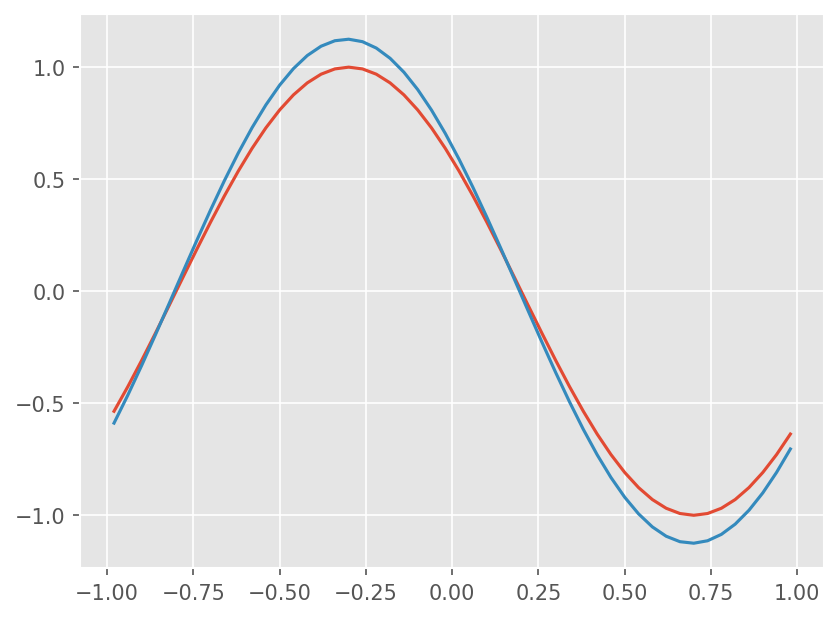

In [5]:
# Condition
a = 1.0

t_target = 1.2
cfl = 0.5

# Make grid
nx = 50
x = np.linspace(-1, 1, nx+1)
dx = np.diff(x)[0]
xc = x[:-1] + 0.5*dx 

# Solution and flux array
u = np.empty(nx+2)
f = np.empty(nx+1)

# Initialize
u[1:-1] = np.sin(np.pi*xc)

# Time step
dt = cfl * dx / abs(a)

# Calculation
t = 0
while abs(t - t_target) > 1e-8:
    # Adjust time step to reach target time
    dt = min(dt, t_target - t)
    
    # Periodic BC
    bc_periodic(u)
    
    # Compute Flux
    #f[:] = unstable_v1(u[:-1], u[1:], a)
    unstable(nx, u, f, a)
    
    # Update solution and time
    u[1:-1] -= dt/dx * (f[1:] - f[:-1])
    t += dt

# Exact solution
u_exact = np.sin(np.pi*(xc - a*t))

# Error (L2)
err = np.sqrt(np.sum((u[1:-1] - u_exact)**2)/len(u_exact))

plt.plot(xc, u_exact)
plt.plot(xc, u[1:-1])
print(err)

## 실습
- Unstable, Upwind 기법으로 위 문제를 격자점을 달리하면서 해석하시오.
   * 격자 개수 ($nx=50, 100, 200, 400$)를 다르게 하면서 오차의 변화를 확인하시오.

- 아래 초기 조건에 대해서 Tranparent 경계 조건이고 $t=0.5$ 일 때 유한체적법으로 계산하라
   * 격자 개수 ($nx=50, 100, 200, 400$)를 다르게 하면서 오차의 변화를 확인하시오.

$$
u(x,0) = \left \{
\begin{array}{cc} 
1 & x \ge 0 \\
-1 & else 
\end{array}
\right .
\approx -\tanh(10^8 x)
$$

- (Optional) 시간차분을 SSP-RK3 기법을 적용해서 해석하시오.

$$
\begin{align}
y^{(1)} &= y_n + \Delta tf(y) \\
y^{(2)} &= \frac{3}{4} y_n + \frac{1}{4} y^{(1)} + \frac{1}{4} \Delta t f(y^{(1)}) \\
y^{n+1} &= \frac{1}{3} y_n + \frac{2}{3} y^{(2)} + \frac{2}{3} \Delta t f(y^{(2)})
\end{align}
$$